## 🍄 Binary Prediction of Poisonous Mushrooms

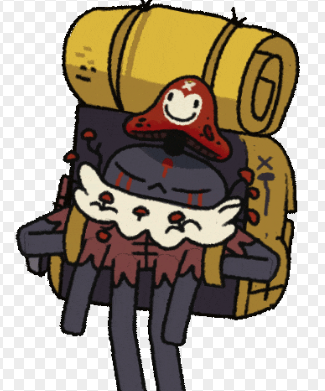

This dataset was done as part of the kaggle [Binary Prediction of Poisonous Mushrooms](https://www.kaggle.com/competitions/playground-series-s4e8/overview)

You can get the data by running these commands on mac (if you've configured your 'kaggle.json' file):
```sh
kaggle competitions download -c playground-series-s4e8
unzip playground-series-s4e8.zip
```


## ⚙️ Initial Configuration

In [111]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

from sklearn.linear_model import LogisticRegression

In [112]:
df = pd.read_csv('./train.csv')
df.head()

,id,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,0,e,8.80,f,s,u,f,a,c,w,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,a
1,1,p,4.51,x,h,o,f,a,c,n,...,NaN,y,o,NaN,NaN,t,z,NaN,d,w
2,2,e,6.94,f,s,b,f,x,c,w,...,NaN,s,n,NaN,NaN,f,f,NaN,l,w
3,3,e,3.88,f,y,g,f,s,NaN,g,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,u
4,4,e,5.85,x,l,w,f,d,NaN,w,...,NaN,NaN,w,NaN,NaN,f,f,NaN,g,a


In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3116945 entries, 0 to 3116944
Data columns (total 22 columns):
 #   Column                Dtype  
---  ------                -----  
 0   id                    int64  
 1   class                 object 
 2   cap-diameter          float64
 3   cap-shape             object 
 4   cap-surface           object 
 5   cap-color             object 
 6   does-bruise-or-bleed  object 
 7   gill-attachment       object 
 8   gill-spacing          object 
 9   gill-color            object 
 10  stem-height           float64
 11  stem-width            float64
 12  stem-root             object 
 13  stem-surface          object 
 14  stem-color            object 
 15  veil-type             object 
 16  veil-color            object 
 17  has-ring              object 
 18  ring-type             object 
 19  spore-print-color     object 
 20  habitat               object 
 21  season                object 
dtypes: float64(3), int64(1), object(18)
memory

In [114]:
df.describe()

,id,cap-diameter,stem-height,stem-width
count,3.116945e+06,3.116941e+06,3.116945e+06,3.116945e+06
mean,1.558472e+06,6.309848e+00,6.348333e+00,1.115379e+01
std,8.997847e+05,4.657931e+00,2.699755e+00,8.095477e+00
min,0.000000e+00,3.000000e-02,0.000000e+00,0.000000e+00
25%,7.792360e+05,3.320000e+00,4.670000e+00,4.970000e+00
50%,1.558472e+06,5.750000e+00,5.880000e+00,9.650000e+00
75%,2.337708e+06,8.240000e+00,7.410000e+00,1.563000e+01
max,3.116944e+06,8.067000e+01,8.872000e+01,1.029000e+02


Some variables have quite a few missing values.

In [115]:
df.shape, df.isna().sum()

((3116945, 22),
 id                            0
 class                         0
 cap-diameter                  4
 cap-shape                    40
 cap-surface              671023
 cap-color                    12
 does-bruise-or-bleed          8
 gill-attachment          523936
 gill-spacing            1258435
 gill-color                   57
 stem-height                   0
 stem-width                    0
 stem-root               2757023
 stem-surface            1980861
 stem-color                   38
 veil-type               2957493
 veil-color              2740947
 has-ring                     24
 ring-type                128880
 spore-print-color       2849682
 habitat                      45
 season                        0
 dtype: int64)

Encode the target variables as **1** for ```poisonous``` and **0** otherwise (there are no other values in the training df so i.e. ```edible```)

We can see in the training data that the classes are nicely balanced.

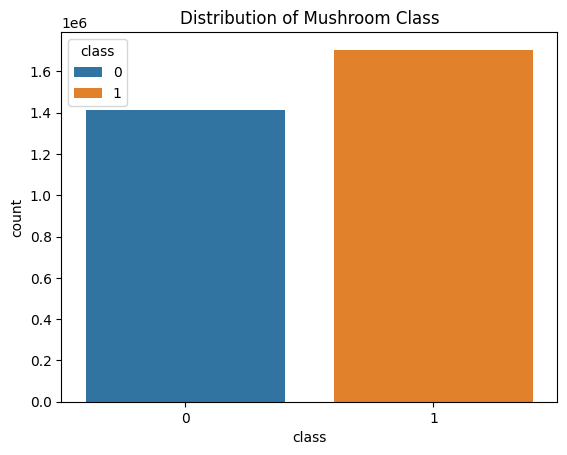

In [116]:
target = 'class'

# Only do this if it's a string, else it'll set everything to 0 if this cell were do be invoked twice without the condition
if df[target].dtype=='O':
    df[target] = np.where((df[target] == 'p'), 1, 0)

sns.countplot(data=df, x=target, hue=target)
plt.title("Distribution of Mushroom Class")
plt.show()

The **ID** simply the index of the row, it provides no value and can be dropped.

In [117]:
df.drop('id', axis=1, inplace=True)
df.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,0,8.80,f,s,u,f,a,c,w,4.51,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,a
1,1,4.51,x,h,o,f,a,c,n,4.79,...,NaN,y,o,NaN,NaN,t,z,NaN,d,w
2,0,6.94,f,s,b,f,x,c,w,6.85,...,NaN,s,n,NaN,NaN,f,f,NaN,l,w
3,0,3.88,f,y,g,f,s,NaN,g,4.16,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,u
4,0,5.85,x,l,w,f,d,NaN,w,3.37,...,NaN,NaN,w,NaN,NaN,f,f,NaN,g,a


Numerical types: this includes **cap-diameter**, **stem-height**, and **stem-width**

In [118]:
numerical_types = list(df.drop('class', axis=1).select_dtypes(['int', 'float']).columns)
numerical_types

['cap-diameter', 'stem-height', 'stem-width']

Observations about Numerical Features:
* There are many outliers, and the scaling method for these columns should take account of this fact in order to allow ML models to best generalize
* Girthier mushrooms (both in cap diameter and in stem width) tend to be slightly more often edible.

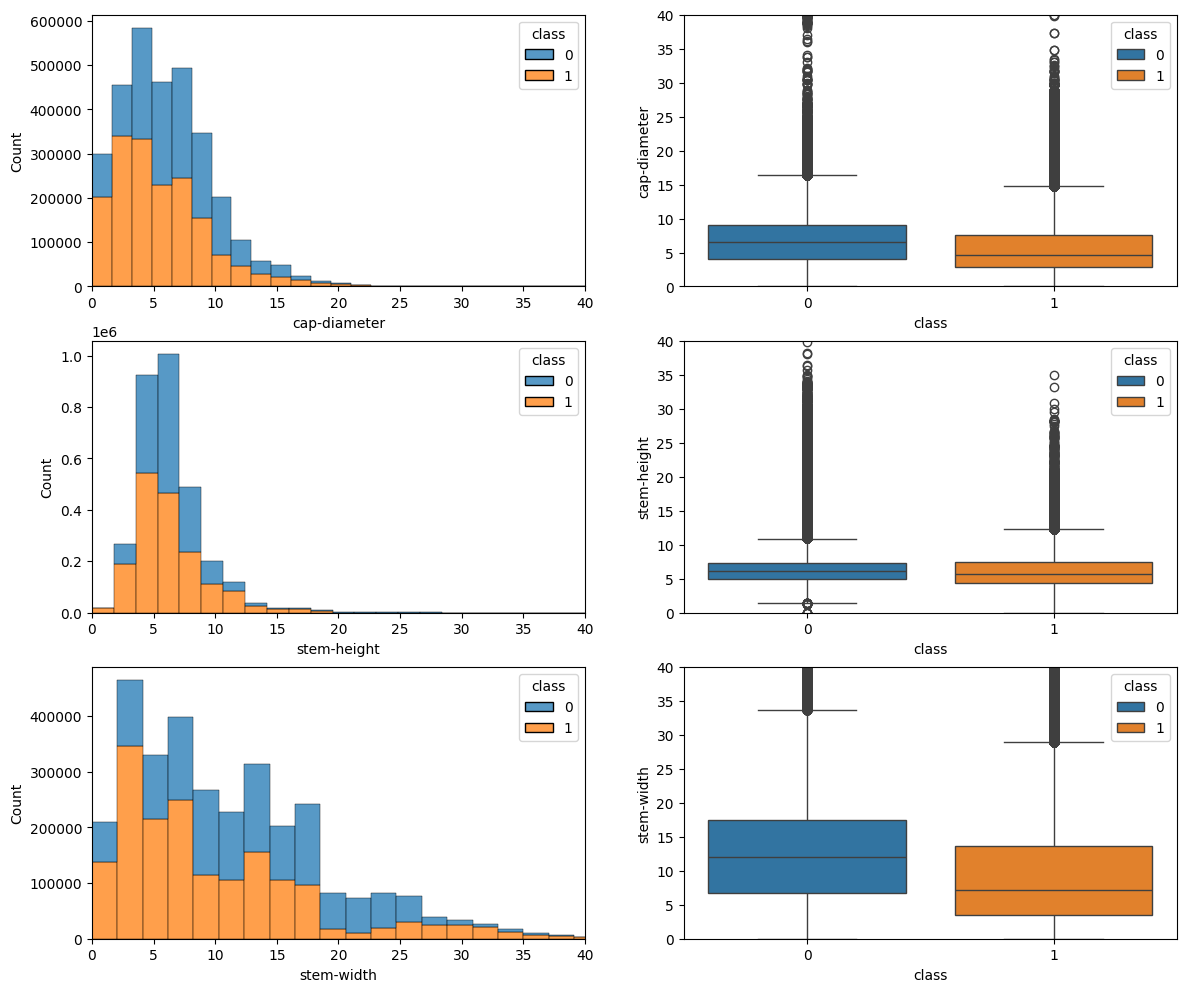

In [119]:
fig, axes = plt.subplots(len(numerical_types), 2)

for idx, col in enumerate(numerical_types):
    sns.histplot(data=df, x=col, ax=axes[idx][0], bins=50, hue=target, multiple='stack')
    axes[idx][0].set_xlim([0, 40])
    sns.boxplot(data=df, x=target, y=col, ax=axes[idx][1], hue=target)
    axes[idx][1].set_ylim([0, 40])


fig.set_figheight(4 * len(numerical_types))
fig.set_figwidth(14)
plt.show()

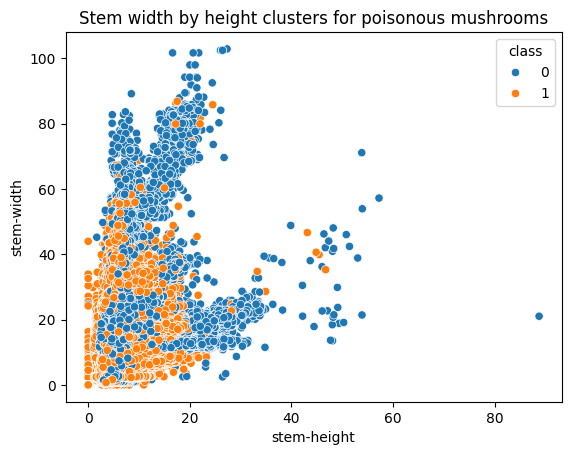

In [120]:
sns.scatterplot(data=df, x='stem-height', y='stem-width', hue=target)
plt.title("Stem width by height clusters for poisonous mushrooms")
plt.show()

<!-- You can see some areas with potential for clusters,  -->

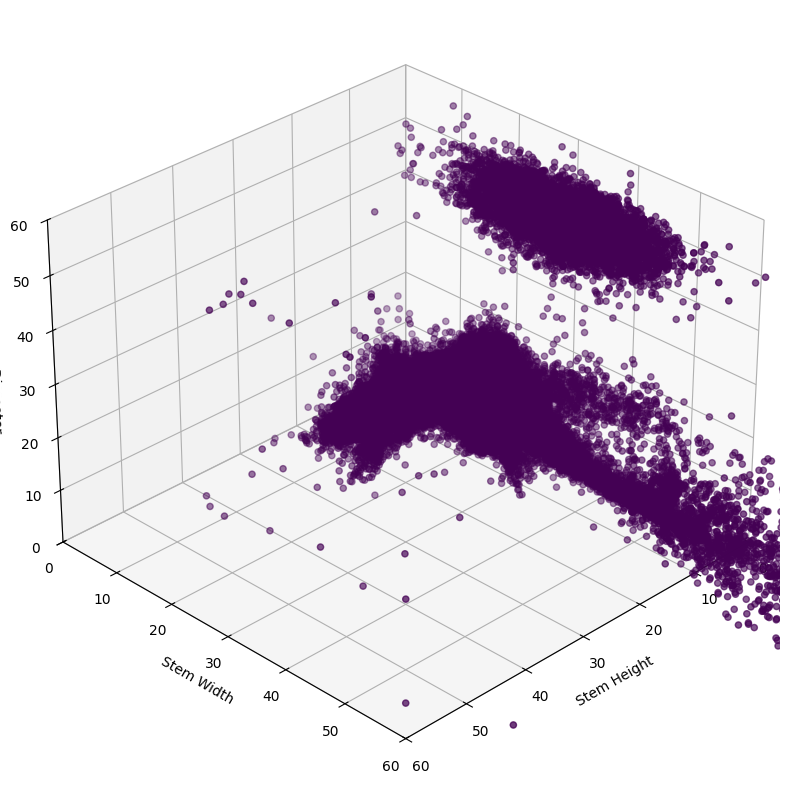

In [121]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

df_edible = df.copy()
df_edible = df_edible[df_edible[target]==0]

# Plot a 3D scatter plot, with color mapped to the target variable
sc = ax.scatter(df_edible['stem-height'], df_edible['stem-width'], df_edible['cap-diameter'], c=df_edible[target], cmap='viridis')  # 'viridis' is a colormap, you can choose others

# plt.colorbar(sc)
ax.set_xlim([0, 60])
ax.set_ylim([0, 60])
ax.set_zlim([0, 60])
ax.set_xlabel("Stem Height")
ax.set_ylabel("Stem Width")
ax.set_zlabel("Cap Diameter")
ax.view_init(azim=45, elev=30)  # Adjust angles as needed

plt.show()

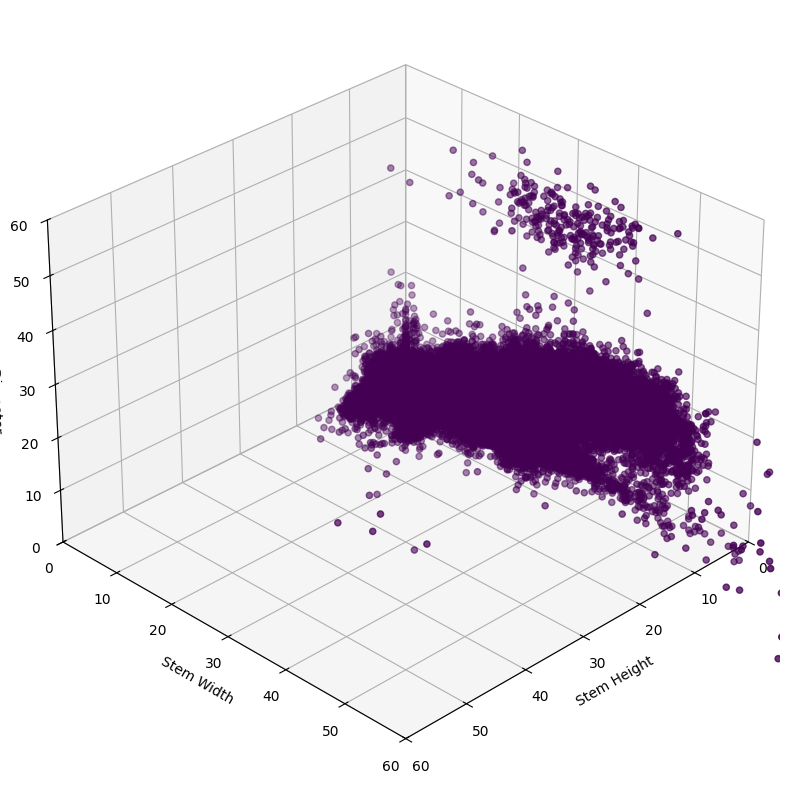

In [122]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

df_poison = df.copy()
df_poison = df_poison[df_poison[target]==1]

# Plot a 3D scatter plot, with color mapped to the target variable
sc = ax.scatter(df_poison['stem-height'], df_poison['stem-width'], df_poison['cap-diameter'], c=df_poison[target], cmap='viridis')  # 'viridis' is a colormap, you can choose others

# plt.colorbar(sc)
ax.set_xlim([0, 60])
ax.set_ylim([0, 60])
ax.set_zlim([0, 60])
ax.set_xlabel("Stem Height")
ax.set_ylabel("Stem Width")
ax.set_zlabel("Cap Diameter")
ax.view_init(azim=45, elev=30)  # Adjust angles as needed

plt.show()

In [123]:
categorical_types = list(df.select_dtypes('O').columns)
categorical_types

['cap-shape',
 'cap-surface',
 'cap-color',
 'does-bruise-or-bleed',
 'gill-attachment',
 'gill-spacing',
 'gill-color',
 'stem-root',
 'stem-surface',
 'stem-color',
 'veil-type',
 'veil-color',
 'has-ring',
 'ring-type',
 'spore-print-color',
 'habitat',
 'season']

In [124]:
# useless_categories = []

for i in categorical_types:
    useless_categories = []
    counts = df[i].value_counts()

    for cat in counts.keys():
        if counts[cat] < 200:
            useless_categories.append(cat)
    # print(counts.keys()[0], counts)

    # df[i] = np.where((df[i].isin(useless_categories)), 'other', df[i])
    df[i] = np.where((df[i].isin(useless_categories)), counts.keys()[0], df[i])

# df['cap-shape'] = np.where((df['cap-shape'].isin(useless_cap_shapes)), 'other', df['cap-shape'])
# df['cap-shape'].value_counts()

Observations:
* Even having an 'other' category may be useless for most variables: it may be better to assign to a 'mode' category for a feature-basis
* **bell**-shaped caps tend to be more poisonous
* cap surface of **t**, **i**, and **k** tend to be much more poisonous
* **brown** (n) cap color tends to be slightly more edible than usual. 

Note there are some green caps despite the graph not showing many. This can be verified by running
```python
df[df['cap-color']=='r'][target].value_counts()
```
The same can be said for the stem root categories of c, r, and f. 
And stem-surface of g, h, and f.
And veil-color of n, k, e, and u

* **Attached** (a) gills tend to be more poisonous than not
* Gill-color has a lot of highly underrepresented categories that will need to be resampled, aggregated or dropped
* Veil type seems pretty useless here.
* Ring type has almost all categories as very underrepresented, it may be best to remove them until we get more data.

In [125]:
# df[df['veil-color']=='u'][target].value_counts()

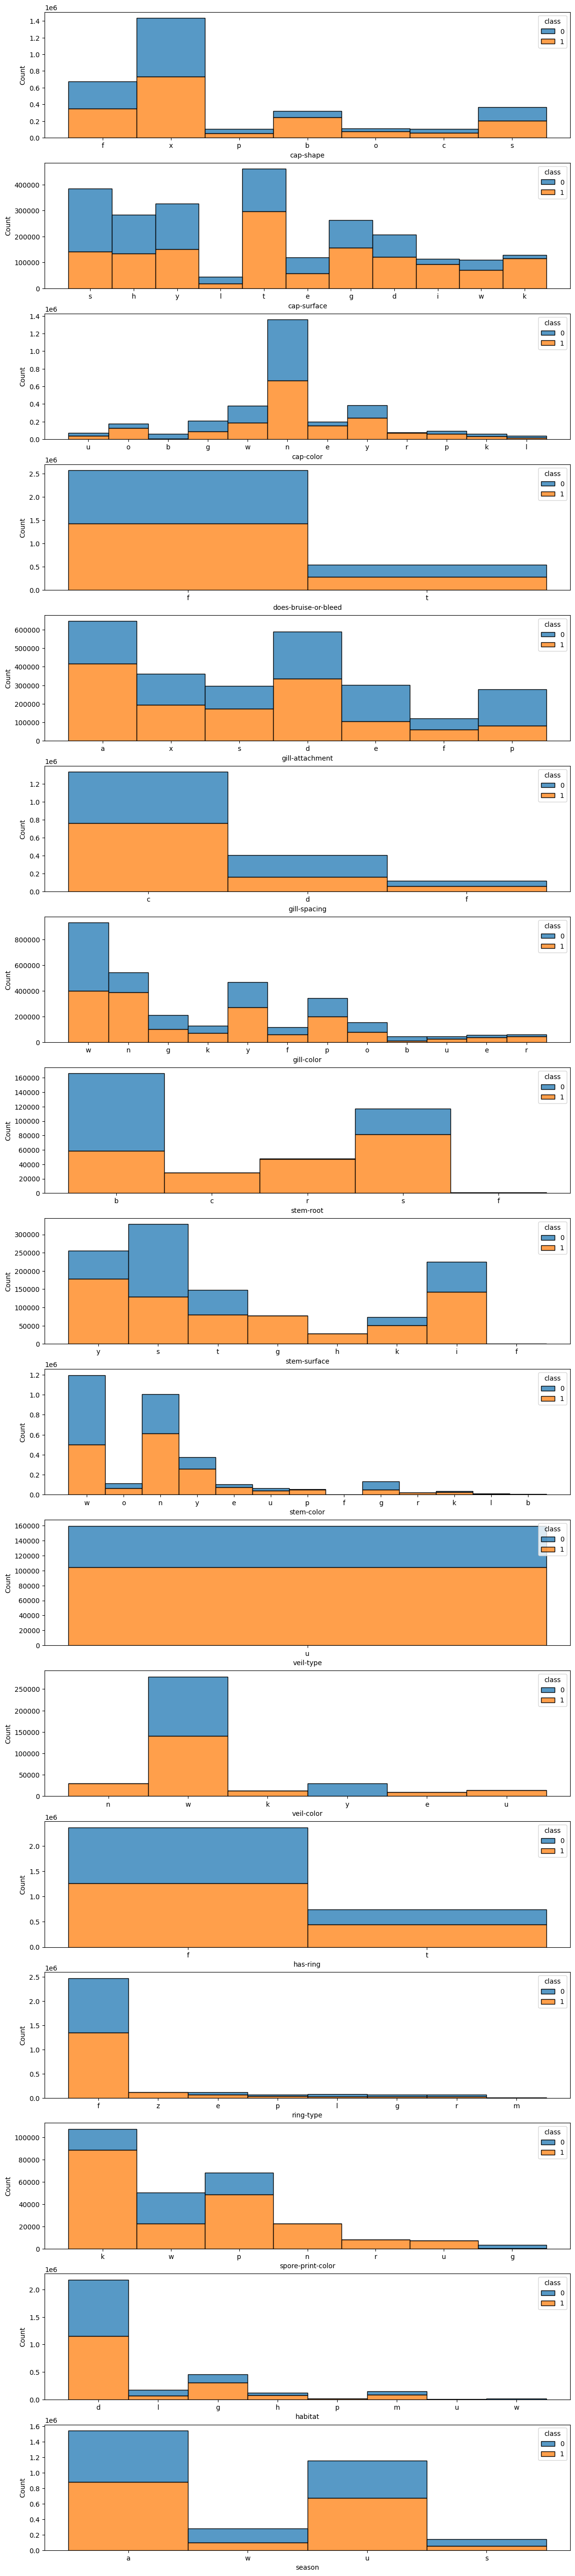

In [126]:
fig, axes = plt.subplots(len(categorical_types), 1)

for i, type in enumerate(categorical_types):
    sns.histplot(data=df, x=type, ax=axes[i], hue=target, multiple='stack')

fig.set_figheight(4 * len(categorical_types))
fig.set_figwidth(14)
plt.show()

Add the encoded columns

In [127]:
for col in categorical_types:
    # In case this cell is executed multiple times
    if col not in df.columns:
        continue
    encoded = pd.get_dummies(df[col], prefix=col+"_")
    df = pd.concat((df, encoded), axis=1)

df.drop(categorical_types, axis=1, inplace=True)

df.columns

Index(['class', 'cap-diameter', 'stem-height', 'stem-width', 'cap-shape__b',
       'cap-shape__c', 'cap-shape__f', 'cap-shape__o', 'cap-shape__p',
       'cap-shape__s',
       ...
       'habitat__h', 'habitat__l', 'habitat__m', 'habitat__p', 'habitat__u',
       'habitat__w', 'season__a', 'season__s', 'season__u', 'season__w'],
      dtype='object', length=120)

Scale the numerical columns

In [128]:
numerical_scaled = []

for col in numerical_types:
    df[col+"_scaled"] = (df[col] - df[col].min()) / (df[col].max() - df[col].min())
    numerical_scaled.append(col+'_scaled')

df[numerical_scaled].describe()

,cap-diameter_scaled,stem-height_scaled,stem-width_scaled
count,3.116941e+06,3.116945e+06,3.116945e+06
mean,7.787510e-02,7.155470e-02,1.083944e-01
std,5.776204e-02,3.043006e-02,7.867325e-02
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.079861e-02,5.263751e-02,4.829932e-02
50%,7.093254e-02,6.627592e-02,9.378037e-02
75%,1.018105e-01,8.352119e-02,1.518950e-01
max,1.000000e+00,1.000000e+00,1.000000e+00


In [129]:
features = list(column for column in df.columns if column not in numerical_types)
# features.remove('class')

features = ['cap-diameter_scaled', 'stem-height_scaled', 'stem-width_scaled']
features

['cap-shape__b',
 'cap-shape__c',
 'cap-shape__f',
 'cap-shape__o',
 'cap-shape__p',
 'cap-shape__s',
 'cap-shape__x',
 'cap-surface__d',
 'cap-surface__e',
 'cap-surface__g',
 'cap-surface__h',
 'cap-surface__i',
 'cap-surface__k',
 'cap-surface__l',
 'cap-surface__s',
 'cap-surface__t',
 'cap-surface__w',
 'cap-surface__y',
 'cap-color__b',
 'cap-color__e',
 'cap-color__g',
 'cap-color__k',
 'cap-color__l',
 'cap-color__n',
 'cap-color__o',
 'cap-color__p',
 'cap-color__r',
 'cap-color__u',
 'cap-color__w',
 'cap-color__y',
 'does-bruise-or-bleed__f',
 'does-bruise-or-bleed__t',
 'gill-attachment__a',
 'gill-attachment__d',
 'gill-attachment__e',
 'gill-attachment__f',
 'gill-attachment__p',
 'gill-attachment__s',
 'gill-attachment__x',
 'gill-spacing__c',
 'gill-spacing__d',
 'gill-spacing__f',
 'gill-color__b',
 'gill-color__e',
 'gill-color__f',
 'gill-color__g',
 'gill-color__k',
 'gill-color__n',
 'gill-color__o',
 'gill-color__p',
 'gill-color__r',
 'gill-color__u',
 'gill-colo

In [130]:
df_train = df.copy()
df_train.dropna(inplace=True)
df_train.isna().sum().sum(), df_train.shape, df.shape

(0, (3116941, 123), (3116945, 123))

In [131]:
# Features and target variables
X = df_train[features]  # Replace 'features' with the actual column names for features
y = df_train[target]    # Replace 'target' with the actual column name for the target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)  # 30% test size
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((2181858, 119), (2181858,), (935083, 119), (935083,))

In [155]:
# Initialize and train the logistic regression model
model = LogisticRegression(max_iter=300)
model.fit(X_train, y_train)
# model.fit(X, y)

/Users/ianfeekes/.pyenv/versions/3.10.13/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Baseline model: logistic regression with only categorical features and default parameters runs with a  weighted average of 0.85 precision and f1-score.

Model with numerical: logistic regression with all features min-max-scaled runs with a weighted average of 0.85 precision and f1-score

In [133]:
# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(report)

Accuracy: 0.85
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.84      0.84    423452
           1       0.87      0.86      0.86    511631

    accuracy                           0.85    935083
   macro avg       0.85      0.85      0.85    935083
weighted avg       0.85      0.85      0.85    935083



In [134]:
len(features), len(model.coef_[0])

(119, 119)

In [135]:
df_test = pd.read_csv('./test.csv')

for col in numerical_types:
    df_test[col] = df_test[col].fillna(df_test[col].mean())

# df_test[target] = np.where((df_test[target] == 'p'), 1, 0)
for col in categorical_types:
    encoded = pd.get_dummies(df_test[col], prefix=col+'_')
    df_test = pd.concat((df_test, encoded), axis=1)

df_test.drop(categorical_types, axis=1)

for col in numerical_types:
    df_test[col+'_scaled'] = (df_test[col] - df_test[col].min()) / (df_test[col].max() - df_test[col].min())

df_test.columns

Index(['id', 'cap-diameter', 'cap-shape', 'cap-surface', 'cap-color',
       'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color',
       'stem-height',
       ...
       'habitat__x', 'habitat__y', 'habitat__z', 'season__a', 'season__s',
       'season__u', 'season__w', 'cap-diameter_scaled', 'stem-height_scaled',
       'stem-width_scaled'],
      dtype='object', length=694)

In [136]:
X_submit = df_test[features]
X_submit.shape, X_test.shape

((2077964, 119), (935083, 119))

In [137]:
df[features]

,cap-shape__b,cap-shape__c,cap-shape__f,cap-shape__o,cap-shape__p,cap-shape__s,cap-shape__x,cap-surface__d,cap-surface__e,cap-surface__g,...,habitat__p,habitat__u,habitat__w,season__a,season__s,season__u,season__w,cap-diameter_scaled,stem-height_scaled,stem-width_scaled
0,False,False,True,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,0.108755,0.050834,0.149563
1,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,True,0.055556,0.053990,0.062974
2,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,0.085689,0.077209,0.096501
3,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,0.047743,0.046889,0.063460
4,False,False,False,False,False,False,True,False,False,False,...,False,False,False,True,False,False,False,0.072173,0.037985,0.081244
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3116940,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,0.114831,0.136835,0.182799
3116941,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,True,False,0.134549,0.074955,0.262099
3116942,False,False,False,False,False,False,True,False,True,False,...,False,False,False,True,False,False,False,0.096602,0.107191,0.107483
3116943,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,True,False,0.116815,0.102908,0.172692


In [138]:
X_submit

,cap-shape__b,cap-shape__c,cap-shape__f,cap-shape__o,cap-shape__p,cap-shape__s,cap-shape__x,cap-surface__d,cap-surface__e,cap-surface__g,...,habitat__p,habitat__u,habitat__w,season__a,season__s,season__u,season__w,cap-diameter_scaled,stem-height_scaled,stem-width_scaled
0,False,False,False,False,False,False,True,False,False,False,...,False,False,False,True,False,False,False,0.014234,0.194275,0.166359
1,False,False,False,True,False,False,False,False,False,False,...,False,False,False,True,False,False,False,0.011367,0.022168,0.104460
2,True,False,False,False,False,False,False,False,False,True,...,False,False,False,False,True,False,False,0.003295,0.107872,0.030512
3,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,True,False,0.005717,0.086926,0.082694
4,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,True,False,0.010165,0.117473,0.133126
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2077959,False,False,False,False,False,False,True,False,False,True,...,False,False,False,False,False,True,False,0.001450,0.046605,0.013118
2077960,False,False,False,False,False,False,True,False,False,False,...,False,False,False,True,False,False,False,0.005140,0.046954,0.071713
2077961,False,False,False,False,False,False,True,False,True,False,...,False,False,False,True,False,False,False,0.009440,0.107523,0.094646
2077962,True,False,False,False,False,False,False,False,False,True,...,False,False,False,True,False,False,False,0.008287,0.104730,0.033622


In [156]:
final_pred = model.predict(X_submit)
final_pred.shape, y_pred.shape

((2077964,), (935083,))

In [157]:
sample_submit = pd.read_csv('./sample_submission.csv')
sample_submit.head()

,id,class
0,3116945,e
1,3116946,e
2,3116947,e
3,3116948,e
4,3116949,e


In [158]:
df_submit = pd.DataFrame()
df_submit['id'] = df_test['id']
df_submit['class'] = np.where((final_pred == 1), 'p', 'e')
df_submit.head()

,id,class
0,3116945,p
1,3116946,p
2,3116947,p
3,3116948,p
4,3116949,e


<Axes: xlabel='class', ylabel='count'>

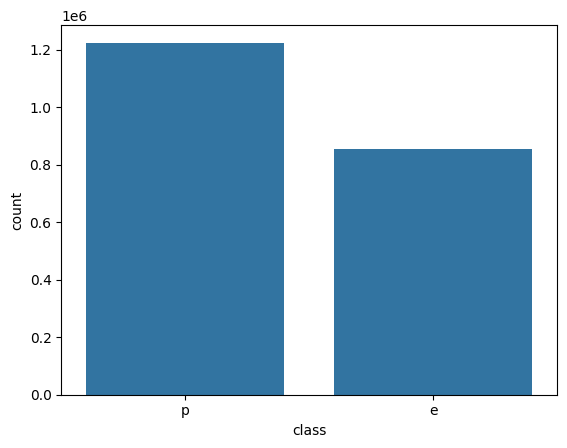

In [159]:
sns.countplot(data=df_submit, x='class')

In [160]:
df_submit.to_csv('./submission.csv', index=False)

In [161]:
!kaggle competitions submit -c playground-series-s4e8 -f submission.csv -m "Message"

100%|██████████████████████████████████████| 19.8M/19.8M [00:01<00:00, 11.6MB/s]
Successfully submitted to Binary Prediction of Poisonous Mushrooms

# Code Signal Stuff

In [144]:
from scipy import stats

# Predefined weights of three different apple varieties in grams
weights_granny_smith = [150, 152, 154, 149, 151]
weights_fuji = [160, 162, 159, 158, 161]
weights_honeycrisp = [165, 168, 167, 164, 166]

# Perform One-way ANOVA on the apple varieties
f_val, p_val = stats.f_oneway(weights_granny_smith, weights_fuji, weights_honeycrisp)
print(f"F-Value: {f_val}, P-Value: {p_val}")

if p_val < 0.05:
    print('The weights of the apple varieties are significantly different. We reject the null hypothesis.')
else:
    print('The weights of the apple varieties are not significantly different. We fail to reject the null hypothesis.')

F-Value: 95.54022988505793, P-Value: 4.2567549377933786e-08
The weights of the apple varieties are significantly different. We reject the null hypothesis.


In [145]:
from scipy import stats

# Observed and expected candy color preferences
observed_preferences = [35, 40, 25, 10]
expected_preferences = [27.5, 27.5, 27.5, 27.5]

# Perform the Chi-Square Test
chi2_stat, p_value = stats.chisquare(observed_preferences, f_exp=expected_preferences)
print("Chi2 Stat:", chi2_stat, "P-value:", p_value)

if p_value < 0.05:
    print('The observed preferences are significantly different from the expected preferences. We reject the null hypothesis.')
else:
    print('The observed preferences are not significantly different from the expected preferences. We fail to reject the null hypothesis.')

Chi2 Stat: 19.09090909090909 P-value: 0.00026181702238540453
The observed preferences are significantly different from the expected preferences. We reject the null hypothesis.


In [146]:
from scipy.stats import chisquare
from random import randint

# Observed candy color preferences
observed = [randint(10, 50) for i in range(100)]

# Calculate the expected frequency
# expected = [randint(15,45) for i in range(100)]
expected = observed.copy()
expected[0] = observed[-1]
expected[-1] = observed[0]

# Perform the Chi-Square Test
stat, p = chisquare(observed, expected)

# Print the test statistic and p-value
print(f"Chi-Square Stat: {stat}, P-value: {p}")

Chi-Square Stat: 110.24458874458874, P-value: 0.20676705786518304


In [147]:
# Perform the Chi-Square Test
chi2_stat, p_value = stats.chisquare(observed_preferences, f_exp=expected_preferences)
print("Chi2 Stat:", chi2_stat, "P-value:", p_value)

if p_value < 0.05:
    print('The observed preferences are significantly different from the expected preferences. We reject the null hypothesis.')
else:
    print('The observed preferences are not significantly different from the expected preferences. We fail to reject the null hypothesis.')

Chi2 Stat: 19.09090909090909 P-value: 0.00026181702238540453
The observed preferences are significantly different from the expected preferences. We reject the null hypothesis.


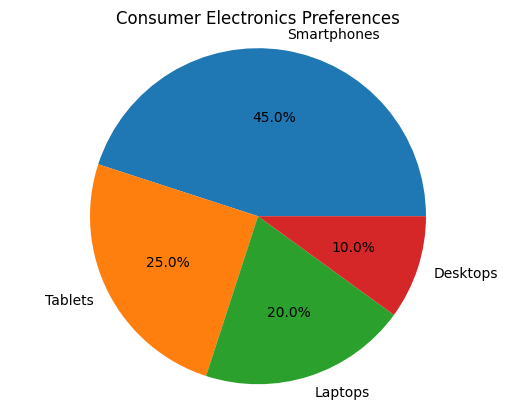

In [148]:
import matplotlib.pyplot as plt

# Market research data: preferences for different types of electronics
products = ['Smartphones', 'Tablets', 'Laptops', 'Desktops']
popularity = [45, 25, 20, 10]

plt.pie(popularity, labels=products, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Consumer Electronics Preferences')
plt.show()

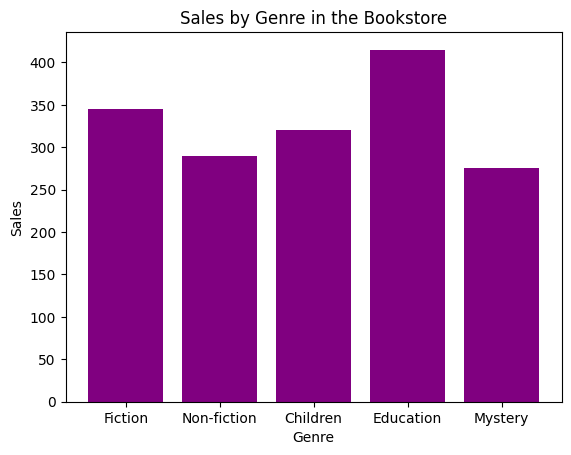

In [149]:
import matplotlib.pyplot as plt

genres = ['Fiction', 'Non-fiction', 'Children', 'Education', 'Mystery']  # Book genres
sales = [345, 290, 320, 415, 275]  # Sales per genre

plt.bar(genres, sales, color='purple')  # Create a bar plot with purple bars
plt.title('Sales by Genre in the Bookstore')
plt.xlabel('Genre')
plt.ylabel('Sales')
plt.show()

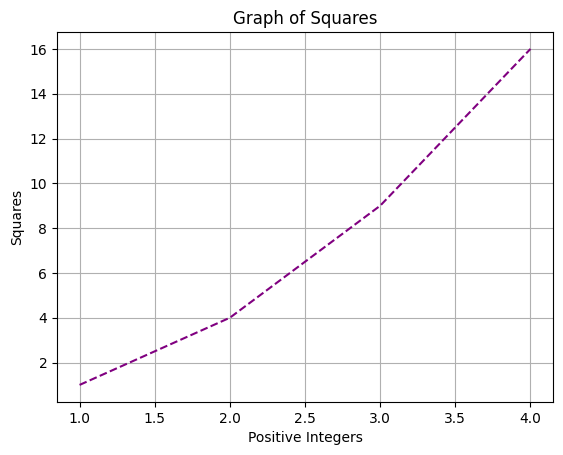

In [150]:
import matplotlib.pyplot as plt

# Plot for the Math and Squares scenario
plt.plot([1, 2, 3, 4], [1, 4, 9, 16], color='purple', linestyle='--')
plt.xlabel('Positive Integers')
plt.ylabel('Squares')
plt.title('Graph of Squares')
plt.grid(True)
plt.show()

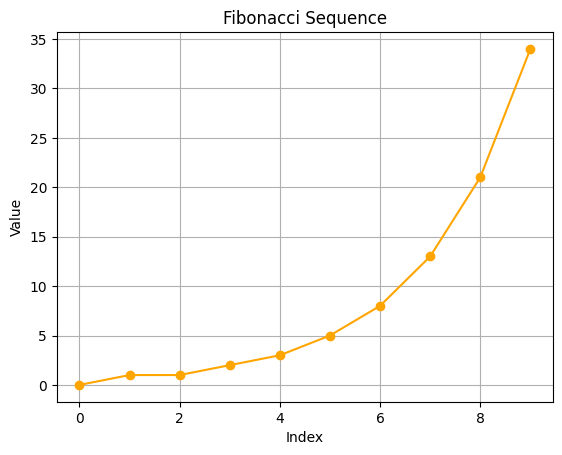

In [151]:
import matplotlib.pyplot as plt

# Fibonacci sequence values
fib_numbers = [0, 1, 1, 2, 3, 5, 8, 13, 21, 34]
plt.plot(range(len(fib_numbers)), fib_numbers, color='orange', linestyle='-', marker='o')
plt.title('Fibonacci Sequence')
plt.xlabel('Index')
plt.ylabel('Value')
plt.grid(True)
plt.show()

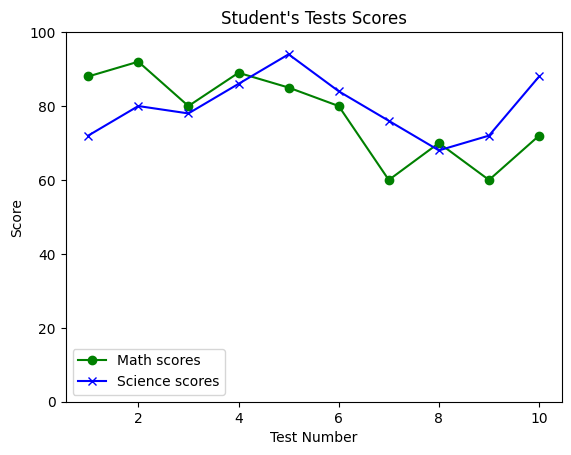

In [152]:
import matplotlib.pyplot as plt

# Data for student performance in two different subjects
math_scores = [88, 92, 80, 89, 85, 80, 60, 70, 60, 72]
science_scores = [72, 80, 78, 86, 94, 84, 76, 68, 72, 88]
tests = range(1, 11)  # Mock test numbers

# Plotting both subjects on the same axis
plt.ylim(0, 100)
plt.plot(tests, math_scores, label='Math scores', color='green', marker='o')
plt.plot(tests, science_scores, label='Science scores', color='blue', marker='x')
plt.title('Student\'s Tests Scores')
plt.xlabel('Test Number')
plt.ylabel('Score')
plt.legend()
plt.show()

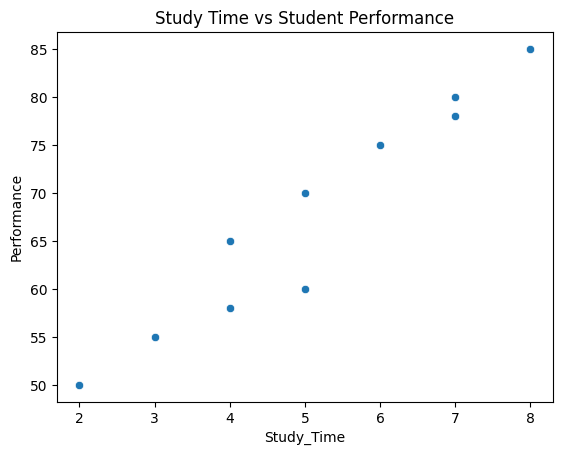

In [153]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Data representing students' study time vs their performance
study_data = pd.DataFrame({
    "Study_Time": [2, 5, 7, 3, 4, 6, 8, 4, 5, 7],
    "Performance": [50, 60, 80, 55, 65, 75, 85, 58, 70, 78]
})

# Plotting the relationship using a scatter plot
sns.scatterplot(x='Study_Time', y='Performance', data=study_data)
plt.title('Study Time vs Student Performance')
plt.show()